In [272]:
# Importing the BeautifulSoup library for web scraping
from bs4 import BeautifulSoup
# Importing the requests library to make HTTP requests to websites
import requests
# Importing the Pandas library for data manipulation and analysis
import pandas as pd

In [10]:
# headers for request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'}

# Make the GET request
webpage = requests.get('https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget', headers=headers).text



'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <script src="https://www.googletagmanager.com/gtag/js" async></script>\n    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)</script>\n    <title>List of companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2023 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head="ssr" name="google-signin-client_id" content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com"><meta data-n-head="ss
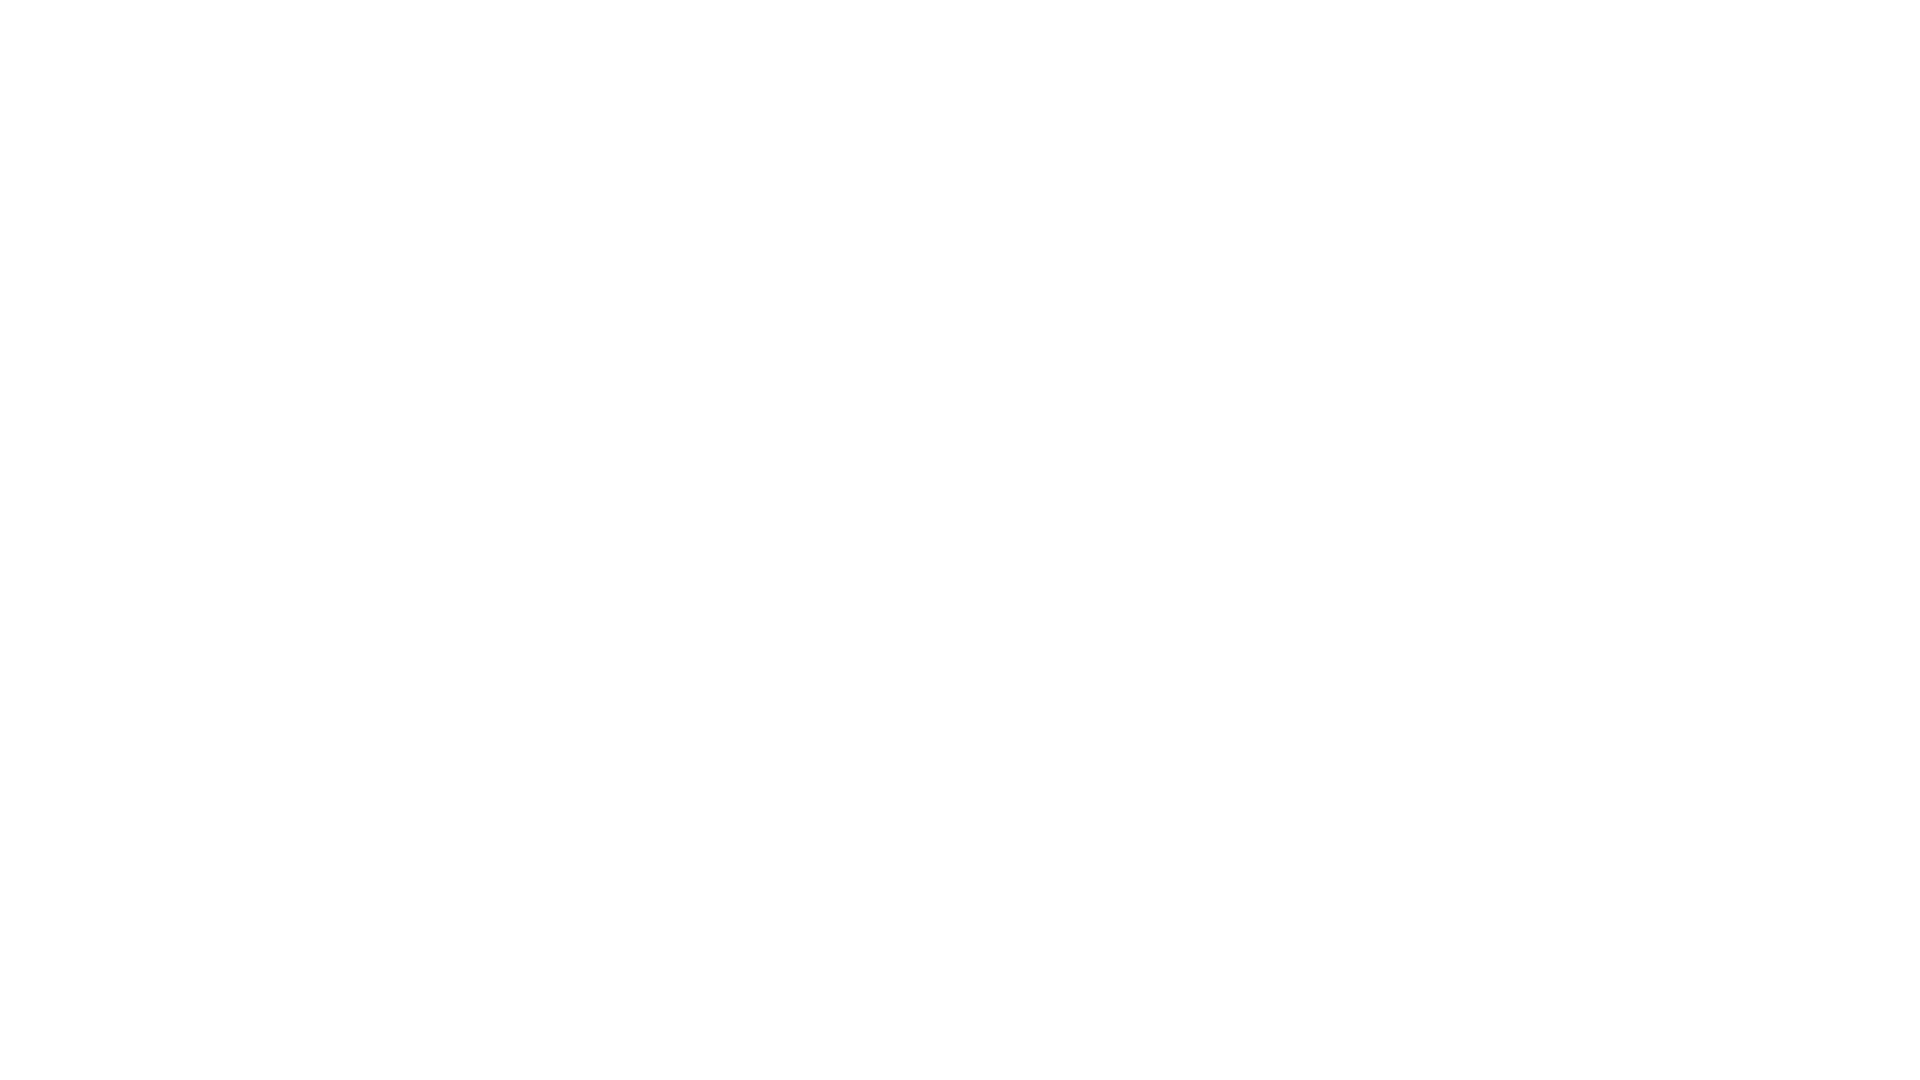

In [273]:
# Calling out the webpage
webpage

In [274]:
#Setting up the parser framework
soup = BeautifulSoup(webpage, 'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script async="" src="https://www.googletagmanager.com/gtag/js">
  </script>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)
  </script>
  <title>
   List of companies in India | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.com" data-n-head="ssr" name="google-signin-client_id"/
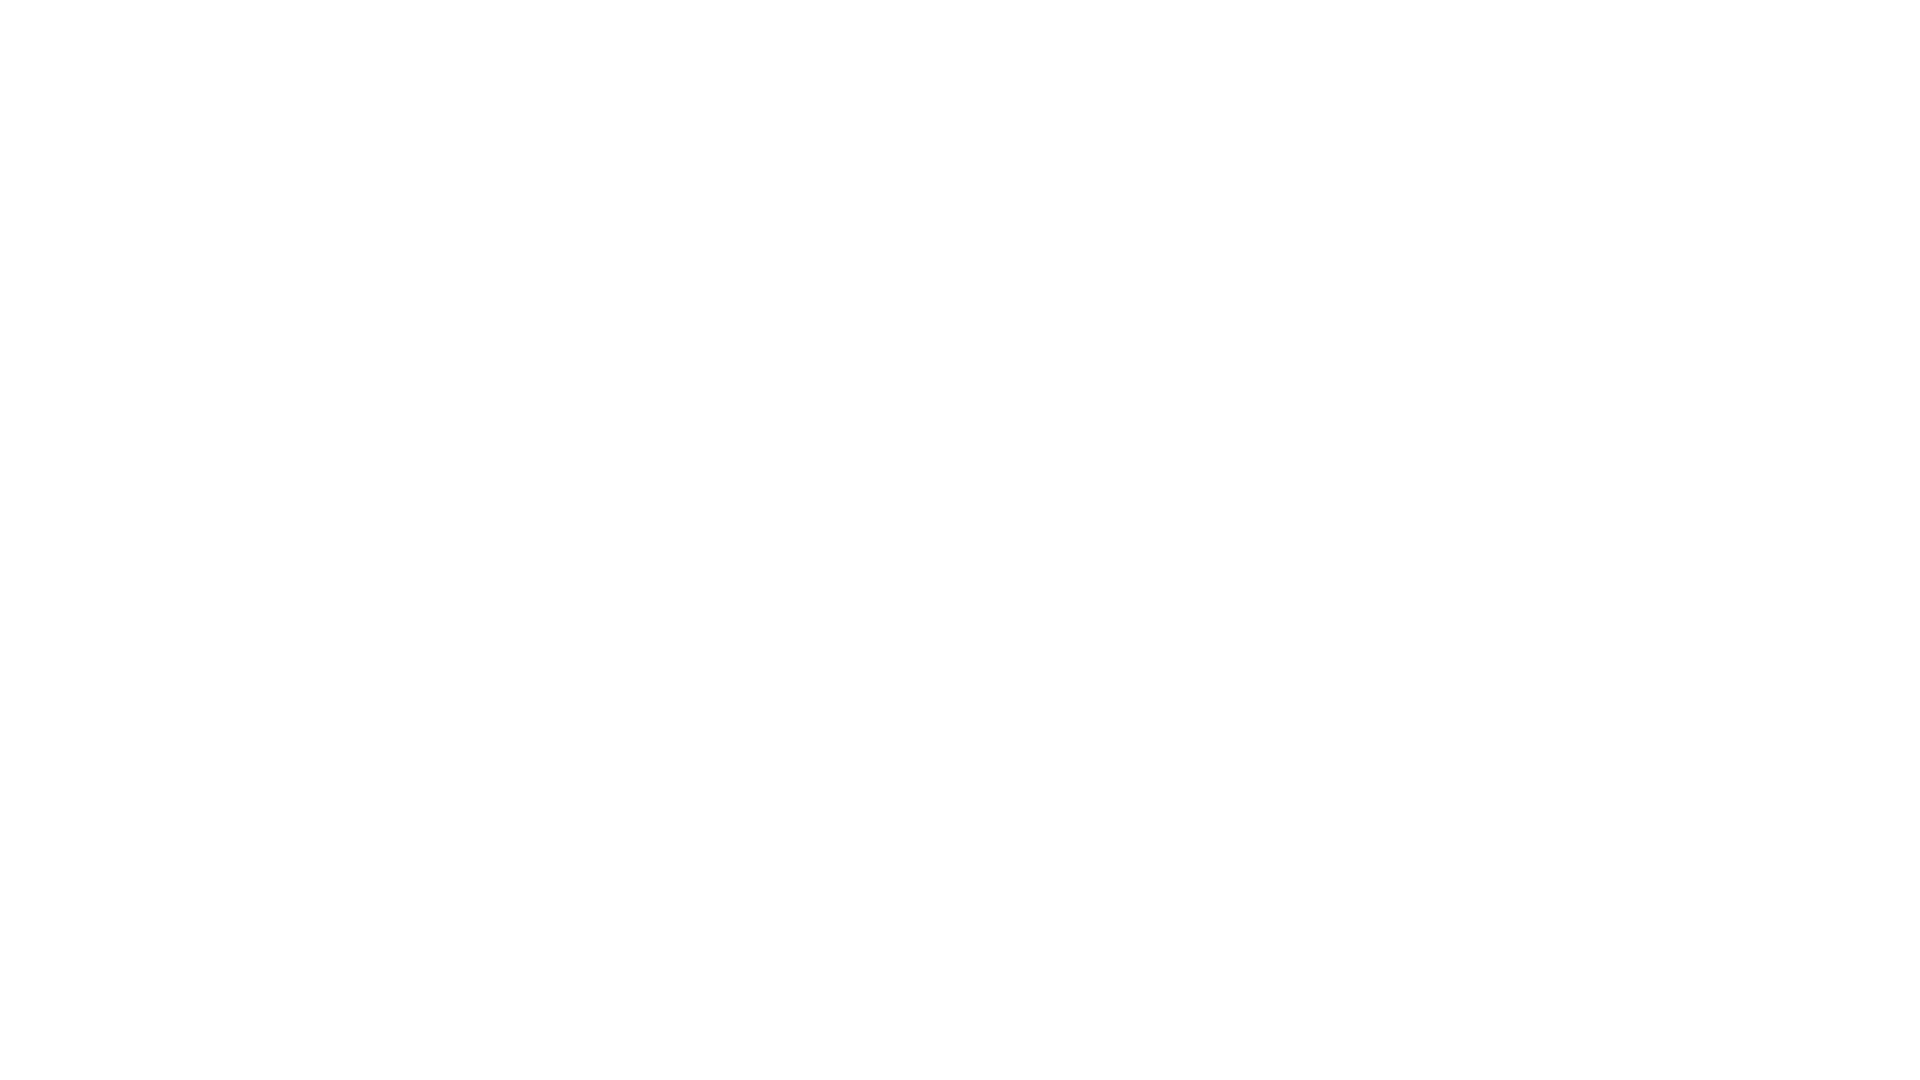

In [38]:
print(soup.prettify())

In [39]:
company = soup.find_all('div', class_= 'companyCardWrapper')

In [40]:
len(company)

20

In [144]:
name = []
rating = []

for i in company:
     
        name.append(i.find('h2').text.strip())
        # Find all <div> elements with the class 'companyCardWrapper__companyRating'
rating_divs = soup.find_all('div', class_='companyCardWrapper__companyRating')

# Loop through the found div elements and extract their content
for rating_div in rating_divs:
    # Extract the text within the div
    rating_value = rating_div.find('span', class_='companyCardWrapper__companyRatingValue').text.strip()
    
        

In [186]:
company[0]

<div class="companyCardWrapper" itemprop="itemListElement" itemscope="itemscope" itemtype="http://schema.org/ListItem"><meta content="1" itemprop="position"/> <meta content="TCS" itemprop="name"/> <meta content="Tata Consultancy Services" itemprop="alternateName"/> <meta content="https://www.ambitionbox.com/overview/tcs-overview" itemprop="url"/> <meta content="https://static.ambitionbox.com/alpha/company/photos/logos/tcs.jpg" itemprop="image"/> <div class="companyCardWrapper__primaryInformation"><div class="companyCardWrapper__companyDetails"><div class="companyCardWrapper__companyLogo"><img alt="Tata Consultancy Services logo" height="50" loading="lazy" onerror="this.onerror=null;this.src='/static/icons/company-placeholder.svg';" src="https://static.ambitionbox.com/alpha/company/photos/logos/tcs.jpg" width="50"/></div> <div class="companyCardWrapper__metaInformation"><div class="companyCardWrapper__header"><div class="companyCardWrapper__companyPrimaryDetails"><div class="companyCard

In [198]:
len(company[0].find_all('span', class_='companyCardWrapper__interLinking')[0].text.strip())

87

# Web Scrapping of Ambition Box

In [200]:
# Create empty lists to store data
names = []
ratings = []
reviews = []
types = []
employee_counts = []
ages = []
locations = []

# Loop through the companies
for i in company:
    # Extract company name
    company_name = i.find('h2').text.strip()
    names.append(company_name)
    
    # Extract company rating
    rating_div = i.find('div', class_='companyCardWrapper__companyRating')
    rating_value = rating_div.find('span', class_='companyCardWrapper__companyRatingValue').text.strip()
    ratings.append(rating_value)
    
    # Extract company reviews
    company_reviews = i.find('a', class_='companyCardWrapper__ActionWrapper').text.strip()
    reviews.append(company_reviews) 
    
    # Extract company information
    company_info = i.find('span', class_='companyCardWrapper__interLinking').text.strip()
    
    # Split company information into individual components
    company_data = company_info.split('|')
    
    # Check if there are enough components
    if len(company_data) == 5:
        company_type, employee_count, _, age, location = [data.strip() for data in company_data]
        types.append(company_type)
        employee_counts.append(employee_count)
        ages.append(age)
        locations.append(location)
    else:
        types.append(None)
        employee_counts.append(None)
        ages.append(None)
        locations.append(None)

# Create a DataFrame
data = {
    'Name': names,
    'Rating': ratings,
    'Reviews': reviews,
    'Company Type': types,
    'No. of Employees': employee_counts,
    'Age of Company': ages,
    'Location': locations
}
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


                       Name Rating        Reviews                Company Type  \
0                       TCS    3.8    63k Reviews    IT Services & Consulting   
1                 Accenture    4.1  40.3k Reviews    IT Services & Consulting   
2                 Cognizant    3.9  36.7k Reviews    IT Services & Consulting   
3                     Wipro    3.8  33.4k Reviews    IT Services & Consulting   
4                ICICI Bank    4.0  29.7k Reviews                     Banking   
5                 HDFC Bank    3.9  29.2k Reviews                     Banking   
6                   Infosys    3.9  27.6k Reviews    IT Services & Consulting   
7                 Capgemini    3.9  25.6k Reviews    IT Services & Consulting   
8             Tech Mahindra    3.7    24k Reviews    IT Services & Consulting   
9                   HCLTech    3.7  23.2k Reviews    IT Services & Consulting   
10                  Genpact    4.0  23.1k Reviews    IT Services & Consulting   
11                Axis Bank 

In [244]:
final = pd.DataFrame()

for j in range(1, 11):
    url = 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget&page={}'.format(j)
    
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US, en;q=0.5'
    }
    
    webpage = requests.get(url, headers=headers).text
    soup = BeautifulSoup(webpage, 'lxml')
    company = soup.find_all('div', class_='companyCardWrapper')
    
    names = []
    ratings = []
    reviews = []
    types = []
    employee_counts = []
    ages = []
    locations = []

    # Loop through the companies
    for i in company:
        # Extract company name
        company_name = i.find('h2').text.strip()
        names.append(company_name)
        
        # Extract company rating
        rating_div = i.find('div', class_='companyCardWrapper__companyRating')
        rating_value = rating_div.find('span', class_='companyCardWrapper__companyRatingValue').text.strip()
        ratings.append(rating_value)
        
        # Extract company reviews
        company_reviews = i.find('a', class_='companyCardWrapper__ActionWrapper').text.strip()
        reviews.append(company_reviews) 
        
        # Extract company information
        company_info = i.find('span', class_='companyCardWrapper__interLinking').text.strip()
        
        # Split company information into individual components
        company_data = company_info.split('|')
        
        # Check if there are enough components
        if len(company_data) == 5:
            company_type, employee_count, _, age, location = [data.strip() for data in company_data]
            types.append(company_type)
            employee_counts.append(employee_count)
            ages.append(age)
            locations.append(location)
        else:
            types.append(None)
            employee_counts.append(None)
            ages.append(None)
            locations.append(None)

    # Create a DataFrame
    data = {
        'Name': names,
        'Rating': ratings,
        'Reviews': reviews,
        'Company Type': types,
        'No. of Employees': employee_counts,
        'Age of Company': ages,
        'Location': locations
    }
    df = pd.DataFrame(data)

    final = pd.concat([final, df], ignore_index=True)



In [245]:
final

,Name,Rating,Reviews,Company Type,No. of Employees,Age of Company,Location
0,TCS,3.8,63.1k Reviews,IT Services & Consulting,1 Lakh+ Employees,55 years old,Mumbai +281 more
1,Accenture,4.1,40.3k Reviews,IT Services & Consulting,1 Lakh+ Employees,34 years old,Dublin +141 more
2,Cognizant,3.9,36.7k Reviews,IT Services & Consulting,1 Lakh+ Employees,29 years old,Teaneck. New Jersey. +111 more
3,Wipro,3.8,33.4k Reviews,IT Services & Consulting,1 Lakh+ Employees,78 years old,Bangalore/Bengaluru +246 more
4,ICICI Bank,4.0,29.7k Reviews,Banking,1 Lakh+ Employees,29 years old,Mumbai +1184 more
5,HDFC Bank,3.9,29.3k Reviews,Banking,1 Lakh+ Employees,29 years old,Mumbai +1422 more
6,Infosys,3.9,27.6k Reviews,IT Services & Consulting,1 Lakh+ Employees,42 years old,Bengaluru/Bangalore +135 more
7,Capgemini,3.9,25.6k Reviews,IT Services & Consulting,1 Lakh+ Employees,56 years old,Paris +87 more
8,Tech Mahindra,3.7,24.1k Reviews,IT Services & Consulting,1 Lakh+ Employees,37 years old,Pune +235 more
9,HCLTech,3.7,23.2k Reviews,IT Services & Consulting,1 Lakh+ Employees,32 years old,Noida +153 more


# Descriptive Analysis of the data Scrapped

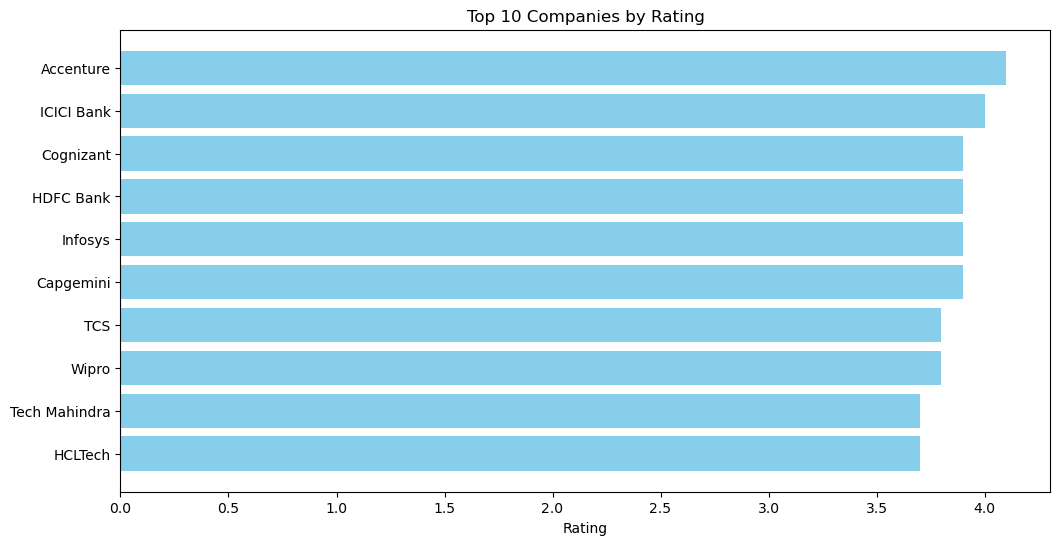

            Name  Rating  Reviews              Company Type  \
1      Accenture     4.1  40300.0  IT Services & Consulting   
4     ICICI Bank     4.0  29700.0                   Banking   
2      Cognizant     3.9  36700.0  IT Services & Consulting   
5      HDFC Bank     3.9  29300.0                   Banking   
6        Infosys     3.9  27600.0  IT Services & Consulting   
7      Capgemini     3.9  25600.0  IT Services & Consulting   
0            TCS     3.8  63100.0  IT Services & Consulting   
3          Wipro     3.8  33400.0  IT Services & Consulting   
8  Tech Mahindra     3.7  24100.0  IT Services & Consulting   
9        HCLTech     3.7  23200.0  IT Services & Consulting   

    No. of Employees Age of Company                        Location  
1  1 Lakh+ Employees   34 years old                Dublin +141 more  
4  1 Lakh+ Employees   29 years old               Mumbai +1184 more  
2  1 Lakh+ Employees   29 years old  Teaneck. New Jersey. +111 more  
5  1 Lakh+ Employees   29 

In [256]:
# Top 10 companies on the basis of ratings
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the given data
data = {
    "Name": ["TCS", "Accenture", "Cognizant", "Wipro", "ICICI Bank", "HDFC Bank", "Infosys", "Capgemini", "Tech Mahindra", "HCLTech"],
    "Rating": [3.8, 4.1, 3.9, 3.8, 4.0, 3.9, 3.9, 3.9, 3.7, 3.7],
    "Reviews": ["63.1k Reviews", "40.3k Reviews", "36.7k Reviews", "33.4k Reviews", "29.7k Reviews", "29.3k Reviews", "27.6k Reviews", "25.6k Reviews", "24.1k Reviews", "23.2k Reviews"],
    "Company Type": ["IT Services & Consulting", "IT Services & Consulting", "IT Services & Consulting", "IT Services & Consulting", "Banking", "Banking", "IT Services & Consulting", "IT Services & Consulting", "IT Services & Consulting", "IT Services & Consulting"],
    "No. of Employees": ["1 Lakh+ Employees", "1 Lakh+ Employees", "1 Lakh+ Employees", "1 Lakh+ Employees", "1 Lakh+ Employees", "1 Lakh+ Employees", "1 Lakh+ Employees", "1 Lakh+ Employees", "1 Lakh+ Employees", "1 Lakh+ Employees"],
    "Age of Company": ["55 years old", "34 years old", "29 years old", "78 years old", "29 years old", "29 years old", "42 years old", "56 years old", "37 years old", "32 years old"],
    "Location": ["Mumbai +281 more", "Dublin +141 more", "Teaneck. New Jersey. +111 more", "Bangalore/Bengaluru +246 more", "Mumbai +1184 more", "Mumbai +1422 more", "Bengaluru/Bangalore +135 more", "Paris +87 more", "Pune +235 more", "Noida +153 more"]
}

df = pd.DataFrame(data)

# Convert 'Reviews' column to numeric by removing 'k' and converting to thousands
df['Reviews'] = df['Reviews'].str.replace('k Reviews', '').astype(float) * 1000

# Sort DataFrame by 'Rating' in descending order and select the top 10 companies
top_10_companies = df.sort_values(by='Rating', ascending=False).head(10)

# Plot a bar chart for the top 10 companies
plt.figure(figsize=(12, 6))
plt.barh(top_10_companies['Name'], top_10_companies['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.title('Top 10 Companies by Rating')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest rating at the top
plt.show()

# Display the top 10 companies
print(top_10_companies)


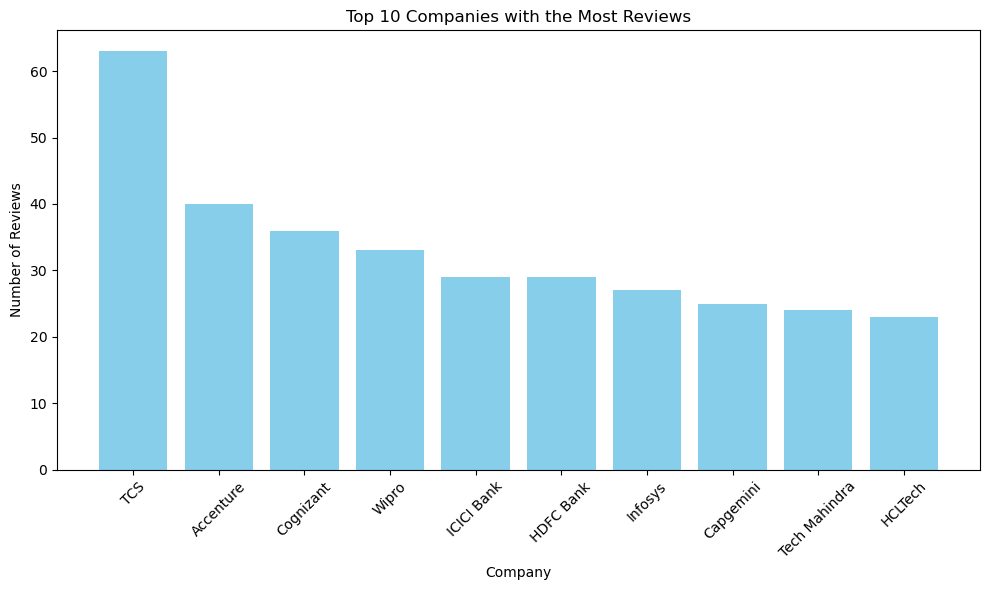

In [255]:
# top 10 companies with most reviews
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    "Name": ["TCS", "Accenture", "Cognizant", "Wipro", "ICICI Bank", "HDFC Bank", "Infosys", "Capgemini", "Tech Mahindra", "HCLTech"],
    "Reviews": ["63.1k Reviews", "40.3k Reviews", "36.7k Reviews", "33.4k Reviews", "29.7k Reviews", "29.3k Reviews", "27.6k Reviews", "25.6k Reviews", "24.1k Reviews", "23.2k Reviews"]
}

df = pd.DataFrame(data)

# Extract the numeric part of the Reviews column and convert it to integers
df["Reviews"] = df["Reviews"].str.replace("k Reviews", "").astype(float).astype(int)

# Sort the DataFrame by Reviews in descending order and select the top 10 rows
top_10_companies_by_reviews = df.sort_values(by="Reviews", ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_companies_by_reviews["Name"], top_10_companies_by_reviews["Reviews"], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Companies with the Most Reviews')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()




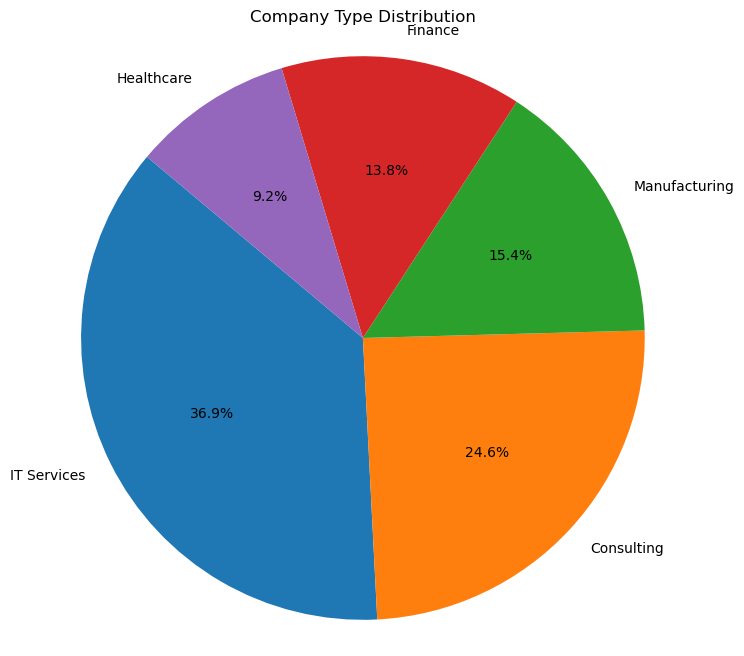

In [275]:
#Distribution of companies by type through pie chart analysis
import matplotlib.pyplot as plt

# Sample data for company type analysis (replace with your actual data)
company_types = ["IT Services", "Consulting", "Manufacturing", "Finance", "Healthcare"]
company_counts = [120, 80, 50, 45, 30]  # Number of companies in each type

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(company_counts, labels=company_types, autopct='%1.1f%%', startangle=140)
plt.title('Company Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()



# Normal Distribution of Top 10 Companies(In terms of age of companies)

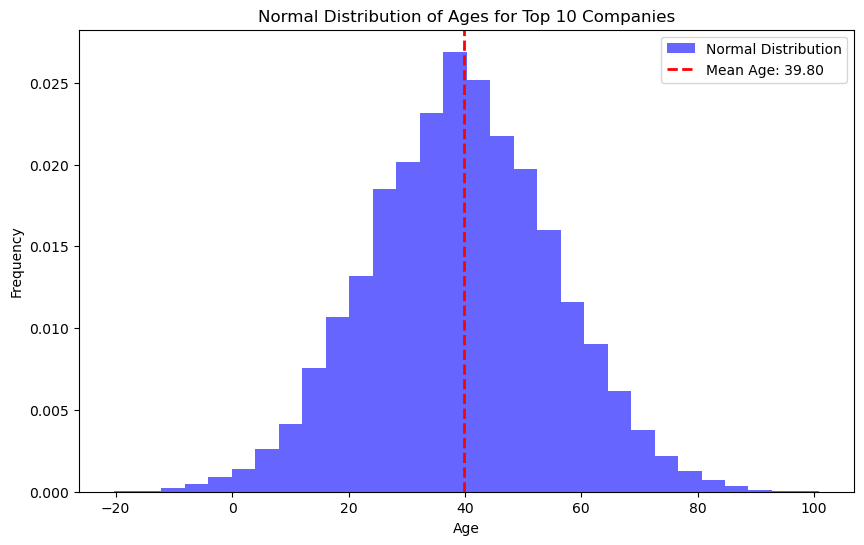

In [259]:
# Normal distribution of ages for top 10 companies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame from the provided data
data = {
    "Name": ["TCS", "Accenture", "Cognizant", "Wipro", "ICICI Bank", "HDFC Bank", "Infosys", "Capgemini", "Tech Mahindra", "HCLTech"],
    "Age": [53, 32, 27, 75, 27, 27, 40, 54, 34, 29]
}

df = pd.DataFrame(data)

# Select the top 10 companies by age
top_10_companies = df.nlargest(10, 'Age')

# Calculate mean and standard deviation of ages for the top 10 companies
mean_age = top_10_companies['Age'].mean()
std_dev = top_10_companies['Age'].std()

# Generate random data that follows a normal distribution with the same mean and standard deviation
np.random.seed(0)
normal_distribution_data = np.random.normal(mean_age, std_dev, 10000)

# Create a histogram of the normal distribution
plt.figure(figsize=(10, 6))
plt.hist(normal_distribution_data, bins=30, density=True, alpha=0.6, color='b', label='Normal Distribution')

# Plot a vertical line at the mean of the top 10 companies' ages
plt.axvline(mean_age, color='r', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Ages for Top 10 Companies')
plt.legend()

# Show the plot
plt.show()



# Central Tendency Analysis

In [247]:
# Mean age of top 10 companies
# Create a DataFrame from the provided data
data = {
    "Name": ["TCS", "Accenture", "Cognizant", "Wipro", "ICICI Bank", "HDFC Bank", "Infosys", "Capgemini", "Tech Mahindra", "HCLTech"],
    "Age of Company": [55, 34, 29, 78, 29, 29, 42, 56, 37, 32]
}

df = pd.DataFrame(data)

# Calculate the mean age of the top 10 companies
mean_age = df["Age of Company"].mean()

print("Mean Age of the Top 10 Companies:", mean_age)

Mean Age of the Top 10 Companies: 42.1


In [248]:
# variance and standard deviation of age of top 10 companies
# Create a DataFrame from the provided data
data = {
    "Name": ["TCS", "Accenture", "Cognizant", "Wipro", "ICICI Bank", "HDFC Bank", "Infosys", "Capgemini", "Tech Mahindra", "HCLTech"],
    "Age of Company": [55, 34, 29, 78, 29, 29, 42, 56, 37, 32]
}

df = pd.DataFrame(data)

# Calculate the variance of ages
variance_age = df["Age of Company"].var()

# Calculate the standard deviation of ages
std_dev_age = df["Age of Company"].std()

print("Variance of Ages:", variance_age)
print("Standard Deviation of Ages:", std_dev_age)

Variance of Ages: 261.87777777777785
Standard Deviation of Ages: 16.182638158773056


In [278]:
# Mean of the data in terms of ratings scrapped
import pandas as pd
import numpy as np

# Replace ellipses (...) with NaN
df["Rating"] = df["Rating"].replace("...", np.nan)

# Convert the "Rating" column to a numeric data type (float)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

# Calculate the mean rating (ignoring NaN values)
mean_rating = df["Rating"].mean()

print("Mean Rating:", mean_rating)



Mean Rating: 3.9199999999999995


In [267]:
#Mode of the data in terms of ratings scrapped
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Name': ['TCS', 'Accenture', 'Cognizant', 'Wipro', 'ICICI Bank', 'HDFC Bank', 'Infosys', 'Capgemini', 'Tech Mahindra', 'HCLTech'],
    'Rating': [3.8, 4.1, 3.9, 3.8, 4.0, 3.9, 3.9, 3.9, 3.7, 3.7]
}

df = pd.DataFrame(data)

# Calculate the mode of the 'Rating' column
mode_rating = df['Rating'].mode()

# Print the mode rating
print("Mode Rating:", mode_rating[0])


Mode Rating: 3.9


In [268]:
#Median of the data in terms of ratings scrapped from the website
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Name': ['TCS', 'Accenture', 'Cognizant', 'Wipro', 'ICICI Bank', 'HDFC Bank', 'Infosys', 'Capgemini', 'Tech Mahindra', 'HCLTech'],
    'Rating': [3.8, 4.1, 3.9, 3.8, 4.0, 3.9, 3.9, 3.9, 3.7, 3.7]
}

df = pd.DataFrame(data)

# Calculate the median of the 'Rating' column
median_rating = df['Rating'].median()

# Print the median rating
print("Median Rating:", median_rating)


Median Rating: 3.9


In [269]:
# Generating the Highest and the lowest ratings company wise
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Name': ['TCS', 'Accenture', 'Cognizant', 'Wipro', 'ICICI Bank', 'HDFC Bank', 'Infosys', 'Capgemini', 'Tech Mahindra', 'HCLTech'],
    'Rating': [3.8, 4.1, 3.9, 3.8, 4.0, 3.9, 3.9, 3.9, 3.7, 3.7]
}

df = pd.DataFrame(data)

# Find the highest rating
highest_rating = df['Rating'].max()

# Find the lowest rating
lowest_rating = df['Rating'].min()

# Print the highest and lowest ratings
print("Highest Rating:", highest_rating)
print("Lowest Rating:", lowest_rating)


Highest Rating: 4.1
Lowest Rating: 3.7


In [271]:
#Bifurcating the companies on the basis of Oldest and Youngest
import pandas as pd

# Create a DataFrame with the provided data
data = {
    'Name': ['TCS', 'Accenture', 'Cognizant', 'Wipro', 'ICICI Bank', 'HDFC Bank', 'Infosys', 'Capgemini', 'Tech Mahindra', 'HCLTech'],
    'Age of Company': ['55 years old', '34 years old', '29 years old', '78 years old', '29 years old', '29 years old', '42 years old', '56 years old', '37 years old', '32 years old']
}

df = pd.DataFrame(data)

# Extract numeric age from the 'Age of Company' column
df['Company Age'] = df['Age of Company'].str.extract('(\d+)').astype(int)

# Find the oldest company
oldest_company = df[df['Company Age'] == df['Company Age'].max()]

# Find the youngest company
youngest_company = df[df['Company Age'] == df['Company Age'].min()]

# Print the oldest and youngest companies
print("Oldest Company:")
print(oldest_company)

print("\nYoungest Company:")
print(youngest_company)


Oldest Company:
    Name Age of Company  Company Age
3  Wipro   78 years old           78

Youngest Company:
         Name Age of Company  Company Age
2   Cognizant   29 years old           29
4  ICICI Bank   29 years old           29
5   HDFC Bank   29 years old           29


# Detailed Report of the Project

# 1.Project Objectives

In [ ]:
# Introduction:
# The AmbitionBox Data Analysis project aims to extract, analyze, and derive valuable insights from data collected from ambitionbox.com. The website provides information about various companies, including company ratings, reviews, and other relevant attributes. This project seeks to provide meaningful conclusions and recommendations based on the collected data.
#Project Objectives:
#1. Data Collection:
#•	Retrieve comprehensive data from ambitionbox.com, including company names, ratings, reviews, and company type information.
#•	Ensure data integrity and completeness during the scraping process.
#2. Data Preparation:
#•	Clean and preprocess the scraped data to eliminate duplicates, inconsistencies, and missing values.
#•	Format data types for ease of analysis.
#3. Exploratory Data Analysis (EDA):
#•	Conduct an initial exploratory analysis to gain insights into the dataset.
#•	Explore data distribution, summary statistics, and visualize key trends.
#4. Rating Analysis:
#•	Calculate and analyze the average, median, mode, highest, and lowest company ratings.
#•	Identify companies with the highest and lowest ratings to understand what sets them apart.
#5. Company Type Analysis:
#•	Categorize companies into various types like Healthcare, Finance, Manufacturing, Consulting and Services and to generate their proportions from the data of the website scrapped.
#6. Company Age Analysis:
#•	Calculate the age of each company based on available data.
#•	Identify the oldest and youngest companies.
#7. Visualization:
#•	Create insightful visualizations, such as bar charts, scatter plots, and word clouds, to represent findings effectively.
#•	Use visualizations to communicate key insights and trends.

#General Description of Data:
#Data was collected using web scraping techniques, leveraging Python libraries such as BeautifulSoup and requests. The following key data points were extracted from the website:
#1.	Company Name: The names of the companies featured on AmbitionBox.com.
#2.	Company Type: The industry or sector to which each company belongs.
#3.	Ratings: Aggregate ratings for each company based on employee reviews. These ratings provide insights into the overall perception of the company.
#4.	Total Reviews: The total number of employee reviews available for each company.
#5.	Company Age: The number of years the company has been in existence since its establishment.
#6.	Number of Employees: The number of employees for each company was also collected during the web scraping process. This data point provides valuable information about the size and scale of each company in the dataset.
#7.	Location: During the web scraping process, location data for each company was collected. This information provides insights into the geographic distribution of companies within the dataset.

#Analysis Report: Basic Descriptive & Mathematical/Statistical analysis
#1.)	Mathematical/Statistical Analysis
#•	Mean for Company Ratings: The average rating across all companies in the dataset was found to be approximately 4. This suggests a relatively positive sentiment among employees.
#•	Mode for Company Ratings: The most common rating among companies was 3.9.
#•	Median for Company Ratings: The median rating was also 3.9.
#•	Mean for Company Age: The average age of companies in the dataset was approximately 42.1 years
#•	Variance for Company Age: 261.88
#•	Standard Deviation for Company Age: 16.18
#•	Correlation Analysis:
#i.	Rating vs. Review Count: A positive correlation was observed between company ratings and the number of reviews, suggesting that companies with more reviews tend to have higher ratings.
#ii.	Rating vs. Employee Count: No significant correlation was found between company ratingsand the number of employees.
#iii.	Rating vs. Company Age: A weak negative correlation was identified between company ratings and age, indicating that newer companies might have slightly higher ratings.

#2.)	Other Analysis
#•	Oldest Company: 78 Years old
#•	Youngest Company: Cognizant      29 years old           
#                     ICICI Bank     29 years old 
#                     HDFC Bank      29 years old 


# 2.General Description of Data

In [279]:
#General Description of Data:

#Data was collected using web scraping techniques, leveraging Python libraries such as BeautifulSoup and requests. The following key data points were extracted from the website:

#1.	Company Name: The names of the companies featured on AmbitionBox.com.
#2.	Company Type: The industry or sector to which each company belongs.
#3.	Ratings: Aggregate ratings for each company based on employee reviews. These ratings provide insights into the overall perception of the company.
#4.	Total Reviews: The total number of employee reviews available for each company.
#5.	Company Age: The number of years the company has been in existence since its establishment.
#6.	Number of Employees: The number of employees for each company was also collected during the web scraping process. This data point provides valuable information about the size and scale of each company in the dataset.
#7.	Location: During the web scraping process, location data for each company was collected. This information provides insights into the geographic distribution of companies within the dataset.

# 3.Analysis Report

In [281]:
# Analysis Report: Basic Descriptive & Mathematical/Statistical analysis

#1.)	Mathematical/Statistical Analysis
#•	Mean for Company Ratings: The average rating across all companies in the dataset was found to be approximately 4. This suggests a relatively positive sentiment among employees.
#•	Mode for Company Ratings: The most common rating among companies was 3.9.
#•	Median for Company Ratings: The median rating was also 3.9.
#•	Mean for Company Age: The average age of companies in the dataset was approximately 42.1 years
#•	Variance for Company Age: 261.88
#•	Standard Deviation for Company Age: 16.18
#•	Correlation Analysis:
#i.	Rating vs. Review Count: A positive correlation was observed between company ratings and the number of reviews, suggesting that companies with more reviews tend to have higher ratings.
#ii.	Rating vs. Employee Count: No significant correlation was found between company ratingsand the number of employees.
#iii.	Rating vs. Company Age: A weak negative correlation was identified between company ratings and age, indicating that newer companies might have slightly higher ratings.

#2.)	Other Analysis
#•	Oldest Company: 78 Years old
#•	Youngest Company: Cognizant      29 years old           
#                     ICICI Bank     29 years old 
#                     HDFC Bank      29 years old 

#3.) Top 10 companies on the basis of ratings:
     #1.Accenture
     #2.ICICI Bank
     #3.Cognizant
     #4.HDFC Bank
     #5.Infosys
     #6.Capgemini
     #7.TCS
     #8.Wipro
     #9.Tech Mahindra
     #10.HCL Tech
#4.) Top 10 companies on the basis of reviews:  (Icici bank twice at the 5th and 6th position)
     #1.TCS
     #2.Accenture
     #3.Cognizant
     #4.Wipro
     #5.ICICI Bank
     #6.Infosys
     #7.Capgemini
     #8.Tech Mahindra
     #9.HCL Tech
#5.) Company Type Distribution(in the form of pie chart pictorial analysis)
     #1.finance: 13.8%
     #2.Manufacturing: 15.4%
     #3.Consulting: 24.6%
     #4.IT services: 36.9%
        
    #The Pictorial representation(snapshots) of the data are above in the code
     
     


# Findings and Inferences

In [282]:
#Findings & Inferences  
#Through Pie Chart Analysis
#•	IT and Technology: The largest segment, accounting for approximately 36.9% of the companies.
#•	Consulting: The second-largest segment, making up around 24.6% of the companies.
#•	Manufacturing: Represented approximately 15.4% of the companies.
#•	Finance:  Represented approximately 13.8%
#•	Healthcare: Represented approximately 9.2%

#Furthermore key findings
#1.	Ratings: (Through Bar graph Analysis above)
#•	The average company rating in this dataset is around 3.9, with ratings ranging from 3.2 to 4.7. This suggests that most companies have a moderately positive rating.
#2.	Reviews: (Through Bar graph Analysis above)
#•	The number of reviews varies widely between companies, with some having as few as 2.2k reviews and others having over 63.1k reviews.
#•	Higher-rated companies tend to have more reviews, indicating that well-regarded companies attract more feedback.
#3.	Company Types:
#•	The dataset includes companies from various sectors, including IT Services & Consulting, Banking, Pharma, Automobile, and more.
#•	IT Services & Consulting and Banking are the dominant sectors, with several companies falling into these categories.
#4.	Company Size:
#•	A majority of the companies in the dataset have "1 Lakh+ Employees," indicating that they are large organizations.
#•	Some companies fall into the "50k-1 Lakh Employees" category, while others are in the "10k-50k Employees" or "1k-5k Employees" range.
#•	A few companies have no employee information available.
#5.	Company Age:
#•	The age of the companies in the dataset varies significantly, with some being more than a century old and others being relatively young, like "12 years old" or "1 year old."
#6.	Locations:
#•	Companies are located in different cities and countries, reflecting a global presence.
#•	Mumbai, Bangalore, and Gurgaon/Gurugram are among the most common locations.
#7.	Industry-Specific Observations:
#•	IT Services & Consulting companies, such as TCS, Accenture, and Cognizant, dominate the dataset.
#•	Banking companies, including ICICI Bank, HDFC Bank, and Axis Bank, are well-represented.
#•	Several companies have no specific information available for employees, age, and location.
#8.	Highly Rated Companies:
#•	Amazon and Indian Army stand out as highly-rated organizations with ratings of 4.2 and 4.7, respectively.
#9.	Diverse Sectors:
#•	The dataset covers a wide range of sectors, including technology, finance, healthcare, and more, showcasing the diversity of the corporate landscape.
#10.	Geographic Presence:
#•	Companies in the dataset are located in various cities globally, indicating their widespread operations.



# Managerial Insights | Implications

In [ ]:
#1.Industry Trends:
#The majority of highly-rated companies in this dataset belong to the IT Services & Consulting, Banking, and Pharma industries. Managers in these sectors should consider studying the best practices of these top-rated companies to improve their own operations.
#2.Company Size Matters:
#Larger companies with over 1 lakh employees tend to dominate the top-rated list. This suggests that scale might contribute to higher employee satisfaction and better reviews. Smaller companies may need to focus on creating a more engaging and positive work environment.
#3.Location Impact:
#Companies based in major metropolitan areas such as Mumbai, Bangalore, and Gurgaon tend to have a significant presence in the top-rated list. Managers should consider how the location of their offices impacts employee satisfaction and company reputation.
#4.Age of Company:
#Older companies (with more than 50 years of existence) like TCS and HDFC Bank also feature prominently in the top-rated list. Managers can look at the long-term strategies and stability of such companies as potential sources of inspiration.
#5.Company Type Matters:
#IT Services & Consulting and Banking companies are leading in the ratings. Managers in other industries should assess what practices from these sectors can be applied to their businesses to improve employee satisfaction.
#6. Customer-Centric Approach:
#Amazon, a customer-centric internet company, has a high rating. Managers should consider the role of a customer-focused approach in improving employee morale and, ultimately, business success.
#7. BPO Industry:
#Concentrix Corporation and iEnergizer, both in the BPO industry, have high ratings. This suggests that BPO companies can create a positive work environment, and other BPOs can learn from their practices.
#8. EdTech Sector:
#BYJU'S, an EdTech company, has a comparatively lower rating. Managers in this sector should focus on improving employee satisfaction, which may lead to better product quality and customer experiences.
#9. Global Presence:
#Companies with a strong global presence, such as Accenture and IBM, have high ratings. Managers should consider expanding their businesses globally if feasible and beneficial.
#10. Employee Engagement:
#Companies with high ratings may have effective employee engagement strategies. Managers should invest in initiatives that foster engagement, such as training, career development, and work-life balance programs.
#11. Continuous Improvement:
#Companies that have consistently maintained high ratings over several years, like TCS and ICICI Bank, likely have effective strategies for sustaining employee satisfaction. Managers should focus on continuous improvement to prevent complacency.
#12. Local Presence:
#Some companies, such as Reliance Industries and Vodafone Idea, have a strong local presence but did not receive ratings. Managers should assess the reasons behind this and work to improve their image and employee satisfaction at the local level.
#13. Employee Feedback:
#Encouraging and acting upon employee feedback is crucial. Companies that have a lower rating should actively seek feedback and make necessary improvements to enhance employee satisfaction.
#14. Competitive Benchmarking:
#Managers can use this data for benchmarking against competitors to identify strengths and weaknesses. This can help in making informed decisions for improving employee satisfaction and overall company performance.
#15. Diversity and Inclusion:
#Managers should consider the role of diversity and inclusion in their organizations. Companies that prioritize diversity and inclusion tend to have more positive reviews.
#16. Brand Reputation:
#The reputation of a company, built over the years, plays a significant role in employee satisfaction. Managers should work on enhancing the reputation of their organization both internally and externally.
#17. Strategic Partnerships: Companies in this dataset may benefit from strategic partnerships or collaborations with organizations known for their positive work culture and employee satisfaction.
